# EDA with Pandas

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('property_data.csv')

In [6]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [8]:
df['ST_NUM']


0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [10]:
df['ST_NUM'].isnull()
# df['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [12]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [13]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [14]:
missing_values = ['n/a', 'na', '--']
missing_values

['n/a', 'na', '--']

In [15]:
df = pd.read_csv('property_data.csv', na_values=missing_values)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [16]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [18]:
# Unexpected Missing Values
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [19]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.NaN
    except ValueError:
        pass
    cnt+=1
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [20]:
df['OWN_OCCUPIED'].isna()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [21]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [26]:
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [27]:
df.isnull().values.any()

True

In [28]:
df['ST_NAME'].isnull().values.any()

False

In [29]:
df.isnull().sum().sum()

12

In [33]:
# Replacing
df['ST_NUM'].fillna(125, inplace=True)

In [37]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,1250.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [38]:
df.loc[2, 'ST_NUM'] = 125

In [39]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [42]:
median = df['NUM_BEDROOMS'].median()

In [43]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [44]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    3.0
3    1.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [46]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [47]:
data

In [48]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [49]:
data_age = data.parse('7.2', skiprows=4, skipfooter=14)

In [51]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [64]:
data_age.rename(columns={"Unnamed: 0": "Year"},inplace=True)

In [62]:
data_age.dropna(inplace=True)

In [65]:
data_age.set_index('Year', inplace=True)

In [66]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [68]:
data_age.shape

(11, 9)

In [69]:
data_age.index

Index(['2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08',
       '2008/09', '2009/10', '2010/11', '2011/12', '2012/13'],
      dtype='object', name='Year')

<AxesSubplot:xlabel='Year'>

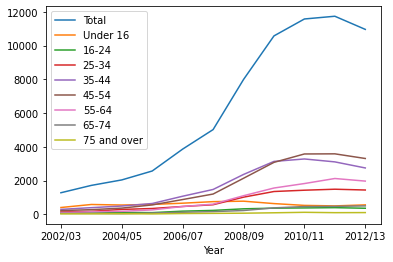

In [70]:
data_age.plot()

In [72]:
data_age_minus_total = data_age.drop(labels='Total', axis=1)

<AxesSubplot:xlabel='Year'>

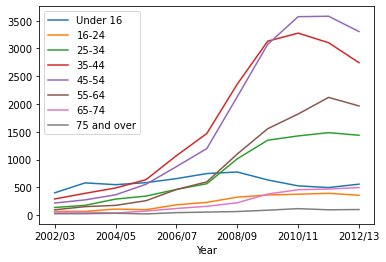

In [73]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

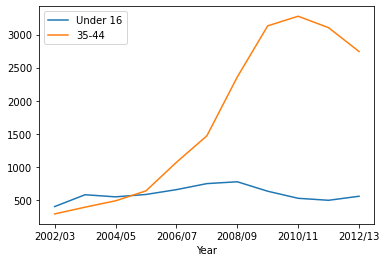

In [76]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)


<AxesSubplot:xlabel='Year'>

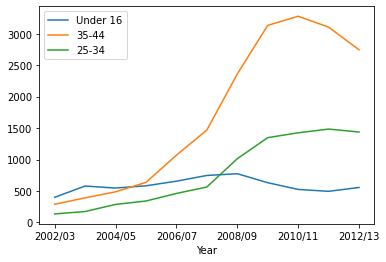

In [77]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)
data_age['25-34'].plot(label="25-34", legend=True)

<AxesSubplot:xlabel='Year'>

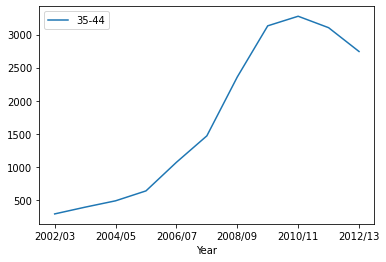

In [78]:
data_age['35-44'].plot(label="35-44", legend=True)

In [81]:
data_age.index

Index(['2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08',
       '2008/09', '2009/10', '2010/11', '2011/12', '2012/13'],
      dtype='object', name='Year')

In [82]:
from datetime import datetime

In [88]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [84]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [85]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='w')
date_rng

DatetimeIndex(['2020-01-05'], dtype='datetime64[ns]', freq='W-SUN')

In [86]:
date_rng_daily = pd.date_range(start='1/01/2020', end='1/08/2020', freq='d')
date_rng_daily

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [89]:
df = pd.DataFrame(date_rng, columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [91]:
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))

df

,date,data
0,2020-01-01 00:00:00,98
1,2020-01-01 01:00:00,83
2,2020-01-01 02:00:00,76
3,2020-01-01 03:00:00,57
4,2020-01-01 04:00:00,26
...,...,...
164,2020-01-07 20:00:00,53
165,2020-01-07 21:00:00,47
166,2020-01-07 22:00:00,12
167,2020-01-07 23:00:00,33


In [93]:
df['datetime'] = pd.to_datetime(df['date'])
df

,date,data,datetime
0,2020-01-01 00:00:00,98,2020-01-01 00:00:00
1,2020-01-01 01:00:00,83,2020-01-01 01:00:00
2,2020-01-01 02:00:00,76,2020-01-01 02:00:00
3,2020-01-01 03:00:00,57,2020-01-01 03:00:00
4,2020-01-01 04:00:00,26,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,53,2020-01-07 20:00:00
165,2020-01-07 21:00:00,47,2020-01-07 21:00:00
166,2020-01-07 22:00:00,12,2020-01-07 22:00:00
167,2020-01-07 23:00:00,33,2020-01-07 23:00:00


In [94]:
df.set_index('datetime', inplace=True)

In [95]:
df

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,98
2020-01-01 01:00:00,2020-01-01 01:00:00,83
2020-01-01 02:00:00,2020-01-01 02:00:00,76
2020-01-01 03:00:00,2020-01-01 03:00:00,57
2020-01-01 04:00:00,2020-01-01 04:00:00,26
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,53
2020-01-07 21:00:00,2020-01-07 21:00:00,47
2020-01-07 22:00:00,2020-01-07 22:00:00,12


In [96]:
df.drop(['date'], axis=1, inplace=True)
df

,data
datetime,
2020-01-01 00:00:00,98
2020-01-01 01:00:00,83
2020-01-01 02:00:00,76
2020-01-01 03:00:00,57
2020-01-01 04:00:00,26
...,...
2020-01-07 20:00:00,53
2020-01-07 21:00:00,47
2020-01-07 22:00:00,12


In [98]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=169, freq=None)

In [99]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [100]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [101]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [103]:
df['2020-01-04' : '2020-01-05']

,data
datetime,
2020-01-04 00:00:00,91
2020-01-04 01:00:00,28
2020-01-04 02:00:00,50
2020-01-04 03:00:00,74
2020-01-04 04:00:00,86
2020-01-04 05:00:00,54
2020-01-04 06:00:00,48
2020-01-04 07:00:00,22
2020-01-04 08:00:00,33


In [104]:
df.resample('D').mean()

,data
datetime,
2020-01-01,53.416667
2020-01-02,50.291667
2020-01-03,58.250000
2020-01-04,64.083333
2020-01-05,46.416667
2020-01-06,54.416667
2020-01-07,52.333333
2020-01-08,0.000000


In [105]:
df.loc['2020-01-01'].mean()

data    53.416667
dtype: float64

In [106]:
df.resample('D').mean()

,data
datetime,
2020-01-01,53.416667
2020-01-02,50.291667
2020-01-03,58.250000
2020-01-04,64.083333
2020-01-05,46.416667
2020-01-06,54.416667
2020-01-07,52.333333
2020-01-08,0.000000


In [107]:
df['rolling_sum'] = df.rolling(3).sum()

In [108]:
df

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,98,NaN
2020-01-01 01:00:00,83,NaN
2020-01-01 02:00:00,76,257.0
2020-01-01 03:00:00,57,216.0
2020-01-01 04:00:00,26,159.0
...,...,...
2020-01-07 20:00:00,53,100.0
2020-01-07 21:00:00,47,115.0
2020-01-07 22:00:00,12,112.0


In [109]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [110]:
df

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,98,NaN,257.0
2020-01-01 01:00:00,83,NaN,257.0
2020-01-01 02:00:00,76,257.0,257.0
2020-01-01 03:00:00,57,216.0,216.0
2020-01-01 04:00:00,26,159.0,159.0
...,...,...,...
2020-01-07 20:00:00,53,100.0,100.0
2020-01-07 21:00:00,47,115.0,115.0
2020-01-07 22:00:00,12,112.0,112.0


In [111]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [113]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [114]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [115]:
opsd_daily.index.year

AttributeError: 'RangeIndex' object has no attribute 'year'

--- Logging error ---
Traceback (most recent call last):
  File "C:\users\zhafran\appdata\local\programs\python\python39\lib\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
    await self.process_one()
  File "C:\users\zhafran\appdata\local\programs\python\python39\lib\site-packages\ipykernel\kernelbase.py", line 450, in process_one
    await dispatch(*args)
TypeError: object NoneType can't be used in 'await' expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\users\zhafran\appdata\local\programs\python\python39\lib\logging\__init__.py", line 1082, in emit
    stream.write(msg + self.terminator)
OSError: [Errno 22] Invalid argument
Call stack:
  File "C:\users\zhafran\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\users\zhafran\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _ru

In [116]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [118]:
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [119]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [120]:
opsd_daily.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [121]:
opsd_daily.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=4383)

In [122]:
opsd_daily.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=4383)

In [124]:
opsd_daily['Year'] = opsd_daily.index.year

In [125]:
opsd_daily['Month'] = opsd_daily.index.month

In [126]:
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [127]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [128]:
opsd_daily.loc['2017-08-19']

Consumption    1130.982
Wind            362.033
Solar           140.368
Wind+Solar      502.401
Year           2017.000
Month             8.000
Weekday           5.000
Name: 2017-08-19 00:00:00, dtype: float64

In [129]:
opsd_daily.loc['2014-08-19' : '2014-08-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-08-19,1365.968,199.641,124.000,323.641,2014,8,1
2014-08-20,1365.495,173.955,129.129,303.084,2014,8,2
2014-08-21,1356.223,68.322,152.260,220.582,2014,8,3
2014-08-22,1344.779,155.872,126.768,282.640,2014,8,4


In [130]:
opsd_daily.loc['2014-07']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-07-01,1407.234,61.670,176.137,237.807,2014,7,1
2014-07-02,1418.936,61.838,145.466,207.304,2014,7,2
2014-07-03,1424.626,61.293,202.577,263.870,2014,7,3
2014-07-04,1401.193,65.633,185.181,250.814,2014,7,4
2014-07-05,1192.741,111.218,121.664,232.882,2014,7,5
2014-07-06,1096.519,101.609,180.376,281.985,2014,7,6
2014-07-07,1415.363,73.447,140.347,213.794,2014,7,0
2014-07-08,1455.751,111.337,59.153,170.490,2014,7,1
2014-07-09,1446.773,144.955,67.393,212.348,2014,7,2


<AxesSubplot:xlabel='Date'>

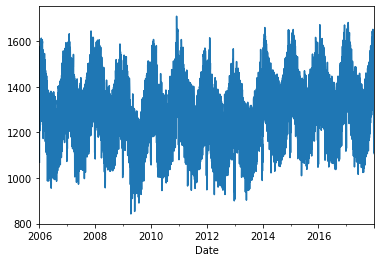

In [131]:
opsd_daily['Consumption'].plot()

<AxesSubplot:xlabel='Date'>

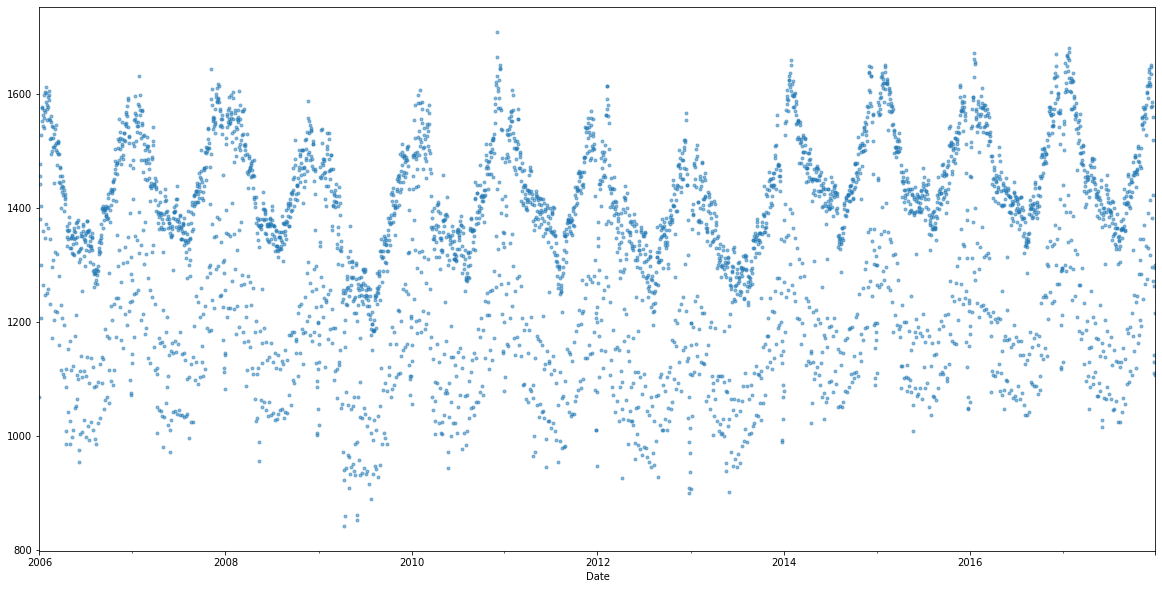

In [140]:
opsd_daily['Consumption'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))

<AxesSubplot:xlabel='Date'>

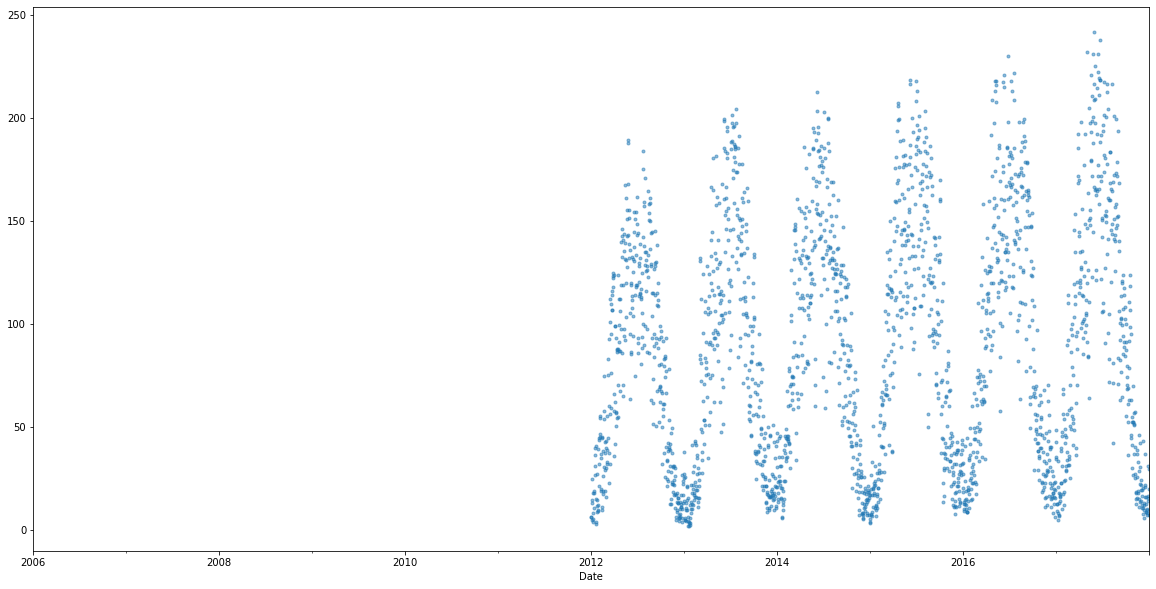

In [139]:
opsd_daily['Solar'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))

<AxesSubplot:xlabel='Date'>

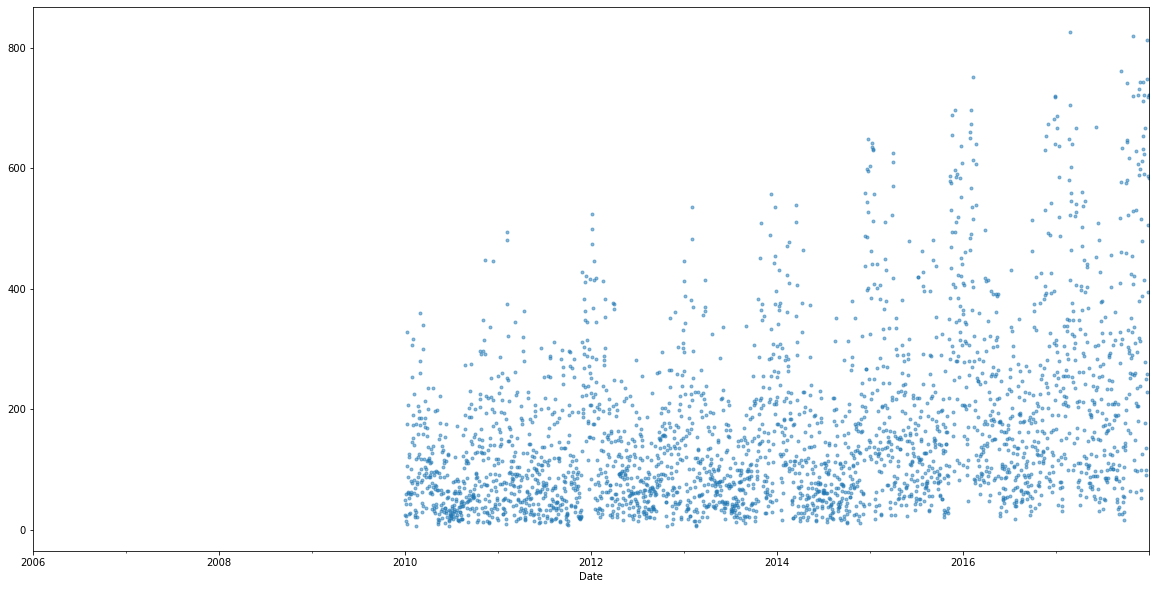

In [138]:
opsd_daily['Wind'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))

C:\Users\Zhafran\AppData\Local\Temp\ipykernel_6080\1964159507.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  opsd_daily['2013']['Solar'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))


<AxesSubplot:xlabel='Date'>

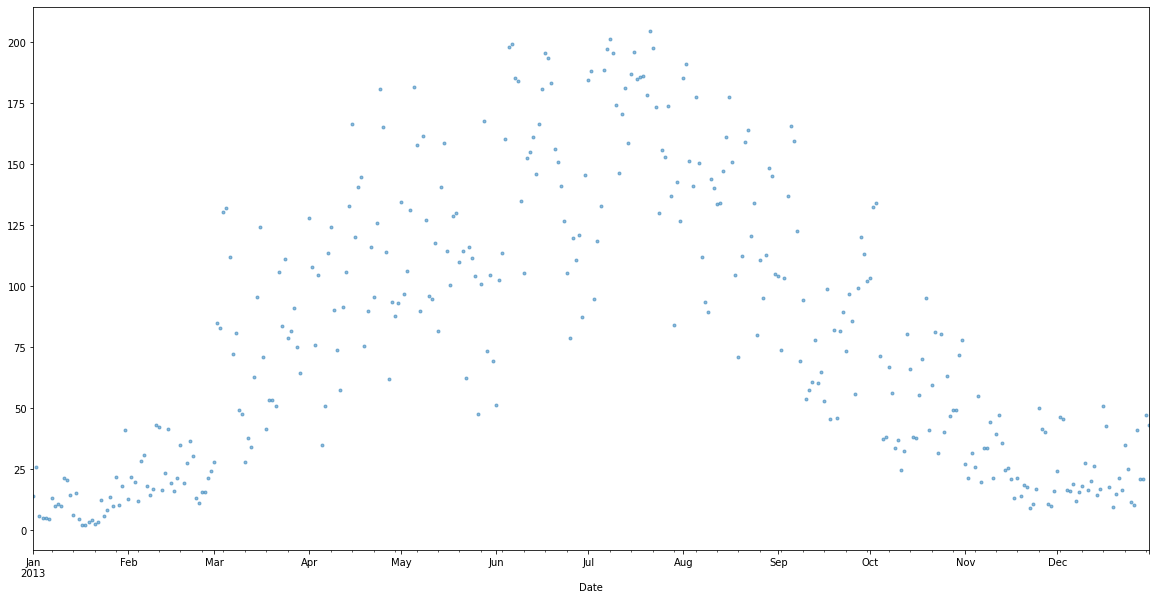

In [142]:
opsd_daily['2013']['Solar'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))

C:\Users\Zhafran\AppData\Local\Temp\ipykernel_6080\2286098717.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  opsd_daily['2013']['Consumption'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))


<AxesSubplot:xlabel='Date'>

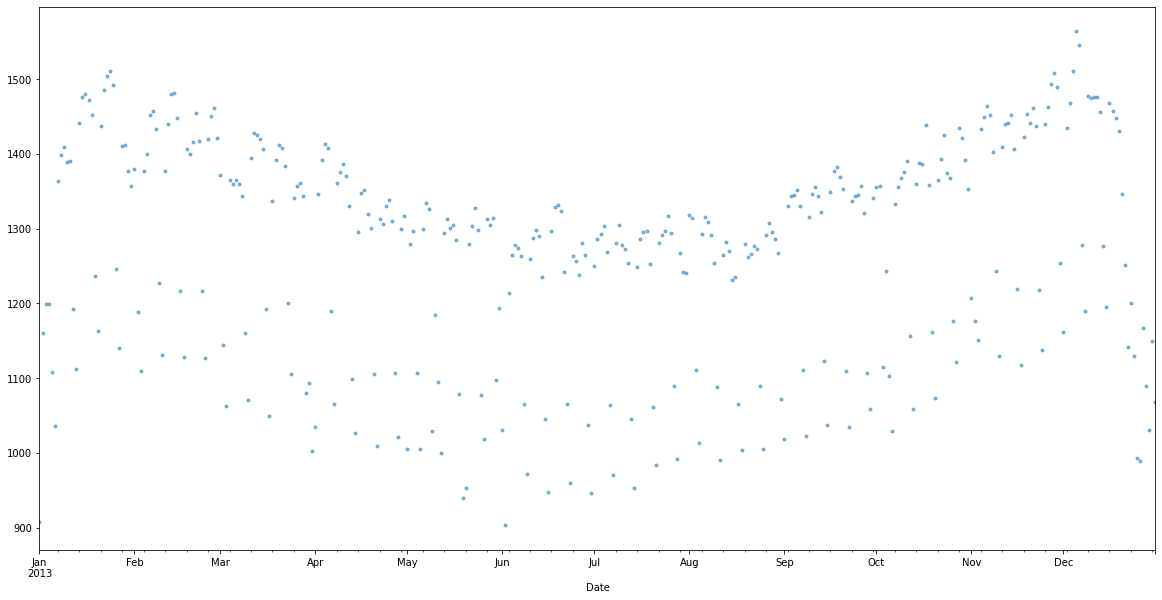

In [143]:
opsd_daily['2013']['Consumption'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))

C:\Users\Zhafran\AppData\Local\Temp\ipykernel_6080\1577522079.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  opsd_daily['2013']['Wind'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))


<AxesSubplot:xlabel='Date'>

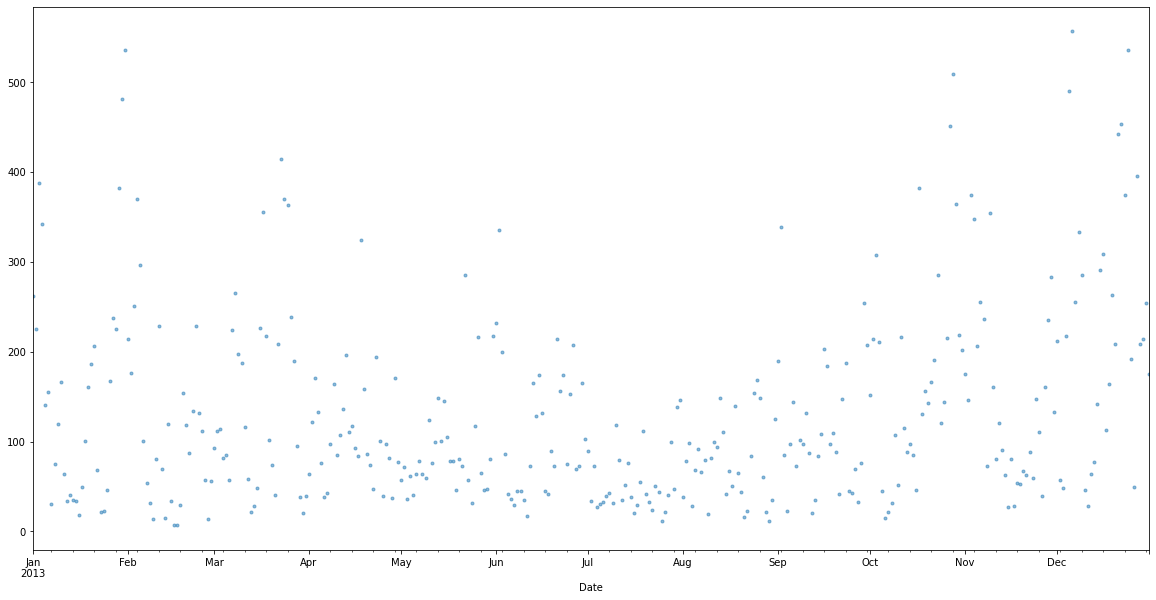

In [144]:
opsd_daily['2013']['Wind'].plot(marker='.', linestyle='None', alpha=0.5, figsize=(20,10))

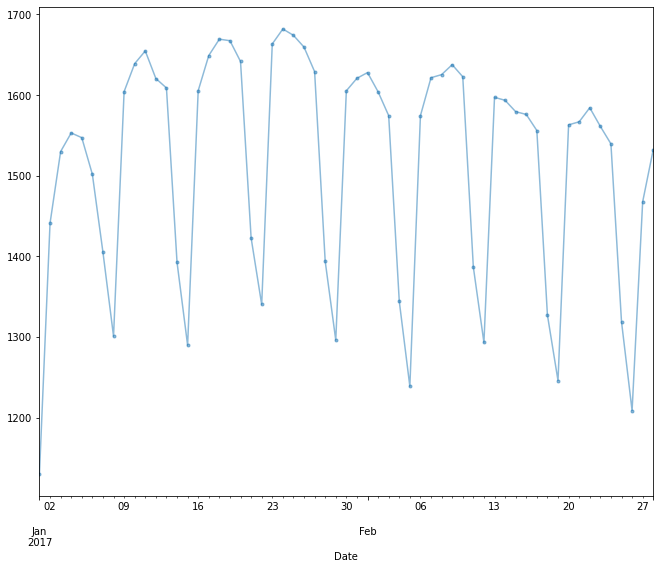

In [147]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='.',alpha=0.5, figsize=(11,9))

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

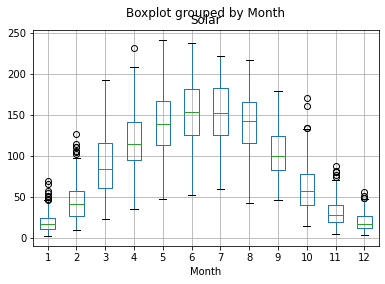

In [150]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

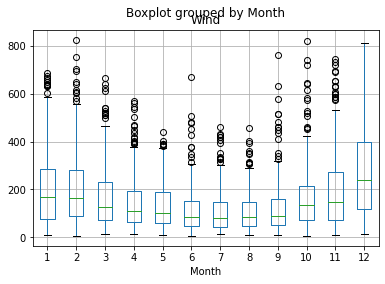

In [152]:
opsd_daily.boxplot(column=['Wind'], by='Month')